## Name: Aryan Mahesh Patil   
### RollNo: 51
#### Exp: 3              Date: 02|02|2026

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
x=np.array([1,2,3]).reshape(-1,1)
y=np.array([2,3,5])

In [57]:
model=LinearRegression()
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [58]:
w=model.coef_[0]
b=model.intercept_

In [59]:
print(f"w (slope) = {w}")
print(f"b (intercept) = {b}")

w (slope) = 1.4999999999999993
b (intercept) = 0.3333333333333348


In [60]:
y_pred=model.predict(x)
print("\n Predictions for training data")
for xi, yi, ypi in zip(x.flatten(), y, y_pred):
    print(f"X={xi}, Actual Sales={yi}, Predicted Sales={ypi:.2f}")


 Predictions for training data
X=1, Actual Sales=2, Predicted Sales=1.83
X=2, Actual Sales=3, Predicted Sales=3.33
X=3, Actual Sales=5, Predicted Sales=4.83


In [61]:
mse= mean_squared_error(y, y_pred)
r2= r2_score(y, y_pred)

print(f"\nMean Squared Error (MSE) = {mse:.4f}")
print(f"R² Score = {r2:.4f}")


Mean Squared Error (MSE) = 0.0556
R² Score = 0.9643


In [62]:
from scipy.optimize import minimize

In [63]:
x=np.array([1,2,3])
y=np.array([2,3,5])

In [64]:
def neg_log_likelihood(params):
    w,b=params
    sigma2 =1 
    y_pred=w*x+b
    nll=0.5*np.sum((y-y_pred)**2/sigma2)
    return nll

In [65]:
initial_guess=[0,0]

In [66]:
result=minimize(neg_log_likelihood, initial_guess)
w_mle, b_mle = result.x

print(f"MLE w= {w_mle}")
print(f"MLE b= {b_mle}")

MLE w= 1.500000003897125
MLE b= 0.3333333918730798


In [67]:
y_pred=w_mle*x+b_mle

print("\nPredicitons for training data:")
for xi, yi, ypi in zip(x, y, y_pred):
    print(f"x={xi}, Actual={yi}, Predicted={ypi:.2f}")


Predicitons for training data:
x=1, Actual=2, Predicted=1.83
x=2, Actual=3, Predicted=3.33
x=3, Actual=5, Predicted=4.83


In [68]:
mse=mean_squared_error(y, y_pred)
r2=r2_score(y, y_pred)

print(f"\nMean Squared Error(MSE)={mse:.4f}")
print(f"R² Score = {r2:.4f}")


Mean Squared Error(MSE)=0.0556
R² Score = 0.9643


In [69]:
we,b=0,0
alpha=0.0001
n_iter=1000
n=len(x)

In [70]:
for i in range(n_iter):
    y_pred=w*x.flatten()+b
    dw=(-2/n)*np.sum(x.flatten()*(y-y_pred))
    db=(-2/n)*np.sum(y-y_pred)
    w-=alpha*dw
    b-=alpha*db
print("Slope(w):",w)
print("Intercept (b):",b)

Slope(w): 1.5794478120381
Intercept (b): 0.042866879790379446


In [71]:
y_pred=w*x+b

In [72]:
print("\n Predictions for training data")
for xi, yi, ypi in zip(x.flatten(), y, y_pred):
    print(f"X={xi}, Actual Sales={yi}, Predicted Sales={ypi:.2f}")


 Predictions for training data
X=1, Actual Sales=2, Predicted Sales=1.62
X=2, Actual Sales=3, Predicted Sales=3.20
X=3, Actual Sales=5, Predicted Sales=4.78


In [73]:
mse=mean_squared_error(y, y_pred)
r2=r2_score(y, y_pred)

print(f"\nMean Squared Error(MSE)={mse:.4f}")
print(f"R² Score = {r2:.4f}")


Mean Squared Error(MSE)=0.0771
R² Score = 0.9505


In [74]:
x=np.array([1,2,3])
y=np.array([2,3,5])
n=len(x)

In [75]:
def loss(w1):
    w0=np.mean(y)-w1*np.mean(x)
    y_pred=w1*x+w0
    return np.sum((y-y_pred)**2)

In [76]:
def gradient(w1):
    w0=np.mean(y)-w1*np.mean(x)
    y_pred=w1*x+w0
    return -2*np.sum(x*(y-y_pred))

In [77]:
lr=0.1
w1=4
iterations=15

In [78]:
w1_values=[]
loss_values=[]

In [79]:
for i in range(iterations):
    w1_values.append(w1)
    loss_values.append(loss(w1))
    grad = gradient(w1)
    w1=w1-lr*grad

In [80]:
w_space=np.linspace(-2,4,200)
loss_space=[loss(w) for w in w_space]

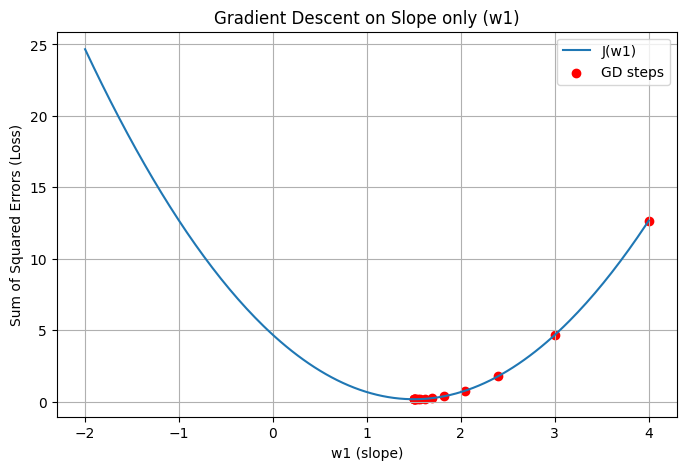

In [81]:
plt.figure(figsize=(8,5))
plt.plot(w_space,loss_space, label="J(w1)")
plt.scatter(w1_values, loss_values, color="red", label="GD steps")
plt.xlabel("w1 (slope)")
plt.ylabel("Sum of Squared Errors (Loss)")
plt.title("Gradient Descent on Slope only (w1)")
plt.legend()
plt.grid(True)
plt.show()